## Diseño aerodinámico

Existen cuatro variables que representan valores de parámetros para el diseño de el ala de una aeronave. Cada uno de estos parámetros puede tomar un valor entre 0 y 63.

El modelo aerodinámico dice que la elevación del ala está dada por la formula:

Elevación = (A - B)2 + (C - D)2 - (A-30)3 - (C-40)3

Encontrar los valores de parámetros que maximicen la elevación del ala.

## Codificación

- Definir como se codificará el problema

Para este problema el cromosoma estará compuesto por 4 genes cada uno de ellos representará el valor de A,B,C y D.

## Adaptación

- Definir como se calculará la adaptación de un individuo
- ¿Existen estados que deben ser penalizados?


In [1]:
import numpy
import matplotlib
import matplotlib.pyplot as plt
#equation_inputs : valores de entrada
#pop : población
def cal_pop_fitness(population):
    fitness = []
    for pop in population:
        fitness.append( (( pop[0] - pop[1])**2 + ( pop[2] - pop[3])**2 - (pop[0] - 30))**3 - (pop[2] - 40)**3 )
    return fitness

## Selección

In [2]:
#pop: población
#fitness: arreglo con los valores de adaptación
#num_parent: cantidad de padres que se quieren obtener
def select_mating_pool(pop, fitness, num_parents):
    #Crear arreglo vacío que contendrá los padres seleccionados
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        #Obtener individuo con mayor adaptación
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        #Obtener índice del individuo
        max_fitness_idx = max_fitness_idx[0][0]
        #Cargar individuo a la lista de padres
        parents[parent_num, :] = pop[max_fitness_idx, :]
        #Setear valor de adaptación a un valor muy malo para que no vuelva a ser elegido
        fitness[max_fitness_idx] = -99999999999
    #Devolver lista de padres
    return parents

## Cruza

In [3]:
#parents: lista de padres
#offspring_size: cantidad de hijos que se quieren obtener
def crossover(parents, offspring_size):
    #Generar arreglo vacío donde se guardarán los hijos
    offspring = numpy.empty((offspring_size,parents.shape[1]))
    #Definir punto de cruce en la mitad de los padre
    crossover_point = numpy.uint8(parents.shape[0]/2)
    for k in range(offspring_size):
        # Índice del primer padre para realizar la cruza
        parent1_idx = k%parents.shape[0]
        # Índice del segundo padre para realizar la cruza
        parent2_idx = (k+1)%parents.shape[0]
        # Generar el primer hijo con la primer mitad de un padre y la segunda de otro
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # Generar el segundo hijo con las partes opuestas
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    #Devolver lista de hijos
    return offspring

## Mutación

In [4]:
#offspring_crossover: lista de hijos a mutar
def mutation(offspring_crossover):
    
    for idx in range(offspring_crossover.shape[0]):
        #Generar un valor aleatorio
        random_value = numpy.random.uniform(0, 63)
        # Sumar el valor aleatorio a uno de los genes
        offspring_crossover[idx, numpy.random.randint(low=0, high=(offspring_crossover.shape[1]-1) )] = random_value
        #offspring_crossover[idx, numpy.random.randint(low=0, high=(offspring_crossover.shape[1]-1) )] = offspring_crossover.shape[idx,offspring_crossover.shape[1] ] + random_value
    #Devolver lista de hijos mutados
    return offspring_crossover

# Algoritmo

In [5]:
#Cantidad de genes
num_genes = 4
#Soluciones por población
sol_per_pop = 100
#Número de padres para cruza
num_parents_mating = 10
#Tamaño de la población
pop_size = (sol_per_pop,num_genes) 
#Crear pobliación inicial con valores aleatorios
new_population = numpy.random.uniform(low=0.0, high=63.0, size=pop_size)
print("Población inicial: ")
print(new_population)
#Cantidad de generaciones a realizar
num_generations = 30

Población inicial: 
[[34.74830433 59.47416419 53.35464003 17.56024779]
 [ 0.63346659 14.01652098 45.32164716 45.17987817]
 [12.44655726 41.02647747 46.33556136  6.7442723 ]
 [20.34663437 58.94218756 55.82503314 15.88484574]
 [36.62427391 37.5000066  13.47727907  5.5602026 ]
 [17.1425191  61.43633809  5.30708329 45.82254936]
 [10.76238105 28.71912742 12.92661537 26.72332432]
 [56.33331445 19.33743998 15.62458854 17.46500498]
 [55.85025955 39.54344499 12.91005084 30.28336513]
 [ 2.60714593 56.08966108 14.92673752 28.58279342]
 [36.35193854 61.17372415 52.91793108 49.38101049]
 [42.29829378 46.17039968  1.80812138 12.34839349]
 [46.64233686  6.40469298 61.16956143 17.4506114 ]
 [53.42956133 43.33544185 48.47557232 59.36359036]
 [37.82029309 38.22173476 41.98471833 10.13308454]
 [ 2.11733801  5.90296671 13.8800282   7.2870108 ]
 [53.62805881 11.05293219  0.72169916 28.77538627]
 [60.75819399 42.71996796 47.82688299 59.43430106]
 [38.12175854 19.32002295 56.41356061 33.9913878 ]
 [46.653734

Mejor resultado :  [[[ 0.17564181 62.7842771   0.29251991 60.91573246]]]
Adaptación del mejor resultado :  443294328831.5053


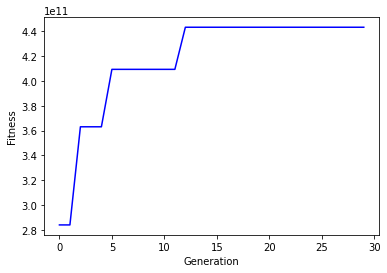

In [6]:
gen = []
fit = []
for generation in range(num_generations):
    # Obtener valores de adaptación de la población
    fitness = cal_pop_fitness(new_population)
    # Selección
    parents = select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    # Cruza
    offspring_crossover = crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0]))

    # Mutación
    offspring_mutation = mutation(offspring_crossover)

    # Crear nueva población basada en los padres y los hijos
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
       

    # Obtener mejor resultado para la generación
    fit.append(numpy.max(cal_pop_fitness(new_population)))
    gen.append(generation)
    

#Obtener la mejor solución
fitness = cal_pop_fitness(new_population)
best_match_idx = numpy.where(fitness == numpy.max(fitness))
print("Mejor resultado : ", new_population[best_match_idx, :])
print("Adaptación del mejor resultado : ", fitness[best_match_idx[0][0]])

#Gráfico
fig, ax = plt.subplots()
ax.plot(gen, fit, 'b')
ax.set_ylabel('Fitness')
ax.set_xlabel('Generation')
plt.show()